In [1]:
#The codes below import necessary packages and libraries for dataviz, distributions and regression analysis
import pandas as pd             #imports the pandas package that is used to manipulate data from the dataset
import matplotlib.pyplot as plt #imports matplotlib.pyplot to create histograms for #dataviz
import seaborn as sns           #imports seaborn used for relationships and regression analysis between variables
from scipy import stats         #imports stats which is important for t-score calcultion
import numpy as np              #imports numpy which is used to manipulate datasets as arrays
import statsmodels.api as statsmodels #this package contains regression functions for regression analysis

In [2]:
#The code below styles the visualization produced
sns.set(font_scale = 1.2) #this applies the scaling and theme of all the plots made.
sns.set_style('darkgrid') #sets the background for the plots made to be a grid which is dark 

In [3]:
data = pd.read_csv('kc_house_data.csv') #reads the dataset and stores it as a pandas dataframe
pd.set_option('max_rows', 10) #sets the maximum number of rows to be displayed that is 10
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
data.describe(include='all') #this displays descriptive statristics for all the variables

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [5]:
#the code below converts the desired datasets into lists for easy manipulation with functions
sqft_living = list(data['sqft_living'].values)
price = list(data['price'].values)

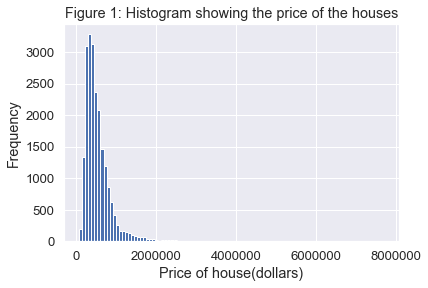

In [6]:
#the code below plots the frequency distribution of the price variable using matplotlib.pyplot
plt.hist(price, bins = 100)
plt.title('Figure 1: Histogram showing the price of the houses')
plt.xlabel('Price of house(dollars)')
plt.ylabel('Frequency')
plt.show()

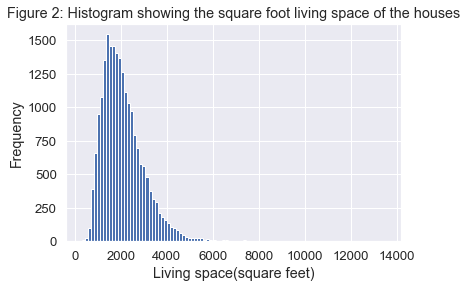

In [7]:
#the code below plots the frequency distribution for the sqft_living variable using matplotlib.pyplot
plt.hist(sqft_living, bins = 100)
plt.title('Figure 2: Histogram showing the square foot living space of the houses')
plt.xlabel('Living space(square feet)')
plt.ylabel('Frequency')
plt.show()

In [8]:
def mult_regression(column_x, column_y):
    """Function that creates a scatterplot, residual plot, residual frequency distribution plot and normal probalility 
    plot from two datasets: predictor and response variable data
    
    Args: 
        array (column_x): list containing the predictor variable data
        array (column_y): list containing the target/response variable data
    
    Returns:
        Figure: Scatter plot with a fitted regression line
        Figure: Residual plot
        Figure: Frequency distribution plot for residuals
        Figure: Normal probability plot for residuals
    """

    # If there is only one predictor variable, plot the regression line
    if len(column_x)==1: #checks whether there is only one predictor variable based on the length of the first input
        plt.figure()     #plots the regression line if there is only one predictor variable
                         #the line below sets the characteristics of the scatterplot with the regression line
                        #it sets the first index of the first input on the x-axis and the second input on the y-axis
        #it sets the type markers of the data points, the fitting line to true and the color of the markers to be orange
        sns.regplot(x=column_x[0], y=column_y, data=data, marker="x",fit_reg=True,color='orange')
    
    # define predictors X and response Y:
    X = data[column_x]
    X = statsmodels.add_constant(X)
    Y = data[column_y]
    
    # construct model: 
    global regressionmodel   #this allows the regressionmodel to be called outside the functions
    regressionmodel = statsmodels.OLS(Y,X).fit() # OLS = "ordinary least squares"
    
    # extract regression parameters from model, rounded to 3 decimal places:
    slope = round(regressionmodel.params[1],3)     #extracts the slope of the model
    intercept = round(regressionmodel.params[0],3) #extracts the intercept of the model

    # residual plot:
    plt.figure()
    
    #the code below describes the plot for the residual plot including the color of markers, font, labels and title
    residualplot = sns.residplot(x=regressionmodel.predict(), y=regressionmodel.resid, color='green')
    residualplot.set(xlabel='Fitted values for '+column_y, ylabel='Residuals')
    residualplot.set_title('Residuals vs Fitted values',fontweight='bold',fontsize=14)
    
    #histogram. The code below plots the frequency distribution of the residuals
    plt.figure() 
    
    #the line below sets the histogram parameters: the axis label, color. It does not plot the kernel density estimate
    sns.distplot(regressionmodel.resid, kde=False, axlabel='Residuals', color='red') 

    #the code below plots the normal probability plot for the residuals to assess the normality of the residuals.
    qqplot = statsmodels.qqplot(regressionmodel.resid,fit=True,line='45') #sets the fit and angle of the line used
    #the line below sets the title and font characteristics
    
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals",fontweight='bold',fontsize=14)          

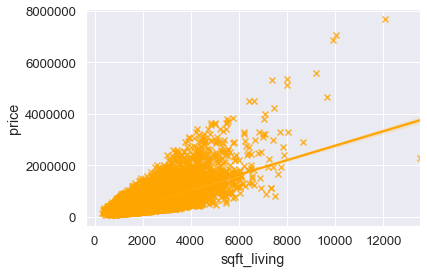

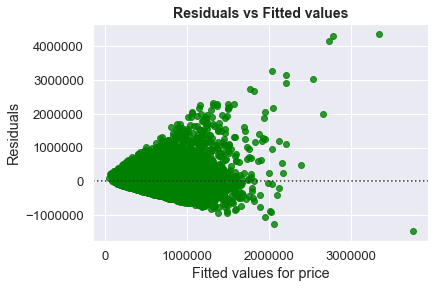

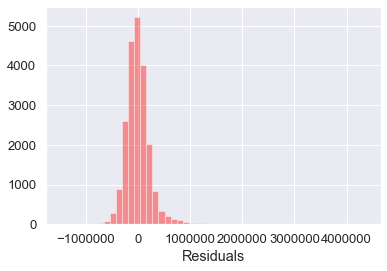

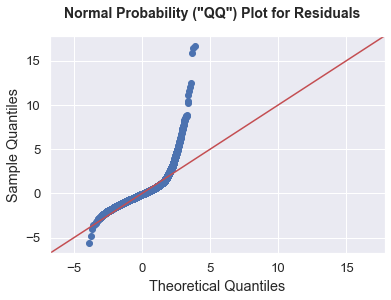

In [9]:
mult_regression(['sqft_living'], 'price') #the code below plots the regression model for the desired variables

In [10]:
#the code below gives a summary of the model statistics. 
#It is helpful to evaluate whether the functions defined below are correct'''
regressionmodel.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Wed, 02 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:40:45   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
def corrco(column_x, column_y):
    """Function to calculate the correlation coefficient between two datasets
    
    Args:
        array (column_x): list containing the predictor variable data
        array (column_y): list containing the target/response variable data
    
    Returns:
        float: correlation coefficient
    """
    
    n = len(column_x) #calculates the size of the predictor variable
    mean_x = np.mean(column_x) #calculates the mean of the predictor vaiable
    mean_y = np.mean(column_y) #calculates the mean of the response variable
    std_x = np.std(column_x) #calculates the standard deviation of the predictor variable
    std_y = np.std(column_y) #calculates the standard deviation of the response variable
    
    summ = 0 #creates a counter for the covariance
    dif_x = 0 #creates a counter for the variation in predictor variable
    dif_y = 0 #creates a counter for the variation in predictor variable
    denom = (n-1)*(std_y)*(std_x) #calculates the denominator: product of standard deviation and degrees of freedom 
    
    for i in range(n): #initiates a for loop that calculates covariance based on the variation in the variables
        dif1_x = column_x[i] - mean_x #gets the variation by getting difference of each item from the mean
        dif1_y = column_y[i] - mean_y
        summ += (dif1_x * dif1_y) #summs up the product of variation in response and predictor variable
        dif_x += dif1_x * dif1_x #adds variation to the counter
        dif_y += dif1_y * dif1_y
    result = summ/denom #calculates the final result which is the correlation coefficient
    return result #returns the result


def r_squared(column_x, column_y):
    """Function that calculates the coefficient of determination between two datasets
    Args:
        array (column_x): list containing the predictor variable data
        array (column_y): list containing the target/response variable data
    
    Returns:
        float: the value of r-squared
    """
    
    r = corrco(column_x, column_y) #calling the correlation coefficient function and calculates r
    R = r**2 #squares the value of r
    return R #returns the result

print('The correlation coefficient is:', corrco(sqft_living, price)) #prints the correlation coefficient
print('The value of r_squared is:', r_squared(sqft_living, price)) #prints the coefficient of determination

The correlation coefficient is: 0.7020675381882683
The value of r_squared is: 0.49289882817773556


In [12]:
def slope(column_x, column_y): 
    """Function that calculates the slope of least squares line between two datasets
    
    Args:
        array (column_x): list containing the predictor variable data
        array (column_y): list containing the target/response variable data
    
    Returns:
        float: the slope of the least squares line
    """
    
    x = np.std(column_x) #calculates the standard deviation of the predictor variable
    y = np.std(column_y) #calculates the standard deviation of the response variable
    r = corrco(column_x, column_y) #calls the correlation coefficient function and calculates r
    result = (y/x) *r #calculates the slope
    return result #returns the result 

print('The slope of the equation is:', slope(sqft_living, price)) #prints the value of the slope 

The slope of the equation is: 280.636552515619


In [13]:
def regression_equation(column_x, column_y):
    """Function that creates the regression equation between two datasets to obtain a model for the data
    
    Args: 
        array (column_x): list containing the predictor variable data
        array (column_y): list containing the target/response variable data
    
    Returns:
        str: containing the regression equation
    """
    
    # fit the regression line using "statsmodels" library:
    X = statsmodels.add_constant(data[column_x])
    Y = data[column_y]
    regressionmodel = statsmodels.OLS(Y,X).fit() #OLS stands for "ordinary least squares"

    # extract regression parameters from model, rounded to 3 decimal places:
    slope = round(regressionmodel.params[1],3) #extracts the slope
    intercept = round(regressionmodel.params[0],3) #extracts the y-intercept
    # print the results:
    print("Regression equation: "+column_y+" = ",slope,"* "+column_x+" + ",intercept)
    #print(r)

In [14]:
regression_equation('sqft_living', 'price')

Regression equation: price =  280.624 * sqft_living +  -43580.743


In [17]:
def conf_interv(column_x, column_y):
    """Function that calculates the confidence interval for the slope estimate and prints it out as well as other important
    values useful in calculating the confidence interval
    
    Args:
        array (column_x): list containing the predictor variable data
        array (column_y): list containing the target/response variable data
    
    Returns:
        str: containing the slope
        str: containing the value of r_squared
        str: containing the standard error
        str: containing the t-score
        str: containing the lower and upper bounds of the slope estimate
    """
    
    b = slope(column_x, column_y)     #calls slope function and calculates slope
    R = r_squared(column_x, column_y) #calls r_squared function and calculates it
    n = len(column_x)                 #gets the size of the dataset
    df = n - 2                        #calculates the degrees of freedom
    std = np.std(column_y)/np.std(column_x) #divides the standard deviation of response by that of predictor
    B = (np.sqrt(1-R))/df             #calculates the variance, divides by df and gets the square root 
    std_err = std * B                 #calculates the standard error
    t = stats.t.ppf(0.99, df)         #calculates the t-score
    lowbound = b - (t * std_err)      #calculates the lower bound
    upbound= b + (t * std_err)        #calculates the upper bound
    print('The slope is:', b)         #prints the value of slope
    print('The value of R_squared is:', R)   #prints the value of r_squared
    print('The standard error is:', std_err) #print s the standard error
    print('The t-score is:', t)              #prints the t-score
    print('The confidence interval is:', [lowbound, upbound]) #prints the confidence interval

In [16]:
conf_interv(sqft_living, price)

The slope is: 280.636552515619
The value of R_squared is: 0.49289882817773556
The standard error is: 0.013171577377493252
The t-score is: 2.3265204407396154
The confidence interval is: [280.60590857161344, 280.6671964596245]
